In [1]:
#Tugas 1 membuat dataframe dan memanipulasi data
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Guru","Membaca Buku","Laki-laki"), 
        ("Budi", 23,"Buruh Pabrik","Memancing","Laki-Laki"), 
        ("Citra", 29,"Notaris","Shopping","Perempuan"), 
        ("Dina", 45,"Ibu Rumah Tangga","Memasak","Perempuan")]
columns = ["Nama", "Usia","Pekerjaan","Hobi","Jenis Kelamin"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/09/02 15:34:20 WARN Utils: Your hostname, Rama, resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/09/02 15:34:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/02 15:34:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

+-----+----+----------------+------------+-------------+
| Nama|Usia|       Pekerjaan|        Hobi|Jenis Kelamin|
+-----+----+----------------+------------+-------------+
|  Ali|  34|            Guru|Membaca Buku|    Laki-laki|
| Budi|  23|    Buruh Pabrik|   Memancing|    Laki-Laki|
|Citra|  29|         Notaris|    Shopping|    Perempuan|
| Dina|  45|Ibu Rumah Tangga|     Memasak|    Perempuan|
+-----+----+----------------+------------+-------------+



In [2]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Guru","Membaca Buku","Laki-laki"),
        ("Budi", 23,"Buruh Pabrik","Memancing","Laki-Laki"),
        ("Citra", 29,"Notaris","Shopping","Perempuan"),
        ("Dina", 45,"Ibu Rumah Tangga","Memasak","Perempuan")]
columns = ["Nama", "Usia","Pekerjaan","Hobi","Jenis Kelamin"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+----------------+------------+-------------+
| Nama|Usia|       Pekerjaan|        Hobi|Jenis Kelamin|
+-----+----+----------------+------------+-------------+
|  Ali|  34|            Guru|Membaca Buku|    Laki-laki|
| Budi|  23|    Buruh Pabrik|   Memancing|    Laki-Laki|
|Citra|  29|         Notaris|    Shopping|    Perempuan|
| Dina|  45|Ibu Rumah Tangga|     Memasak|    Perempuan|
+-----+----+----------------+------------+-------------+

+----+----+----------------+------------+-------------+
|Nama|Usia|       Pekerjaan|        Hobi|Jenis Kelamin|
+----+----+----------------+------------+-------------+
| Ali|  34|            Guru|Membaca Buku|    Laki-laki|
|Dina|  45|Ibu Rumah Tangga|     Memasak|    Perempuan|
+----+----+----------------+------------+-------------+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+----------------+------------+-------------+
| Nama|Usia|       Pekerjaan|        Hobi|Jenis Kelamin|
+-----+----+----------------+--

In [3]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()
# Menampilkan DataFrame Pandas

+----+----+----------------+------------+-------------+
|Nama|Usia|       Pekerjaan|        Hobi|Jenis Kelamin|
+----+----+----------------+------------+-------------+
| Ali|  34|            Guru|Membaca Buku|    Laki-laki|
|Dina|  45|Ibu Rumah Tangga|     Memasak|    Perempuan|
+----+----+----------------+------------+-------------+



NameError: name 'plt' is not defined

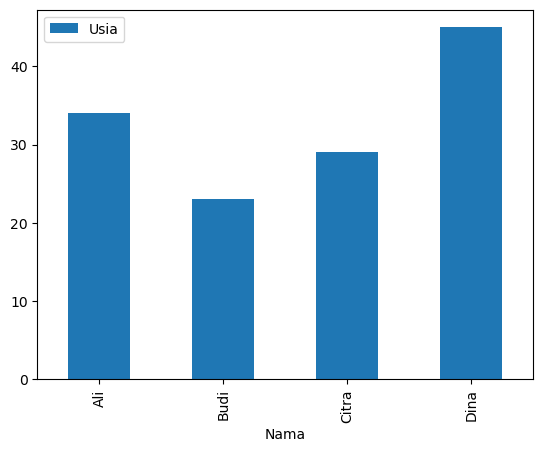

In [4]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], 
               "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], 
                 "Pekerjaan": ["Guru", "Buruh Pabrik", "Notaris", "Ibu Rumah Tangga"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")

# Plotting Data
df_joined.plot(x='Nama', kind='bar')
plt.show()
df_joined

In [5]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

#Perintah untuk menghitung rata-rata usia
df.groupBy().agg(avg("Usia")).show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+



In [6]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

#Menampilan nilai maksimum usia
from pyspark.sql.functions import max
df.groupBy().agg(max("Usia")).show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+---------+
|max(Usia)|
+---------+
|       45|
+---------+

